# Case Study: Predicting Breast Cancer

#### Author: Rainier Goubault | LinkedIn: https://www.linkedin.com/in/rainiergoubault/

## Data Description

#### Task:
In this case study, we aim to accomplish building a prediction model that will classify whether or not breast tissue is malignant (cancerous) or benign (harmless). The dataset contains measurements of breast tissue, obtained by a medical imaging technique. From that, several measurements of the cell nuclei are derived.

#### Dataset:
The dataset used can be found at: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

## 1. Gather the data

##### Imports

In [1]:
# Warning
import warnings
warnings.filterwarnings('ignore')

# Data Manipulation
import numpy as np 
import pandas as pd

# Statistics
from scipy import stats
from scipy.stats import norm, skew
from scipy.stats import mannwhitneyu

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, \
                                    learning_curve, validation_curve, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, classification_report, precision_score, recall_score
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

# Set visualiation options
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

sns.set(font_scale=1.5)
sns.set_style('white')

# Set notebook options
pd.set_option('display.max_columns', None) # display all columns
pd.set_option('display.max_rows', 100) # display 100 rows

##### Load the dataset

In [2]:
df = pd.read_csv('breast_cancer.csv')

In [3]:
df.shape

(569, 33)

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## 2. Primary data analysis

In [5]:
data = df.drop(['diagnosis'], axis=1)
target = pd.DataFrame(df['diagnosis'])

In [6]:
data.shape, target.shape

((569, 32), (569, 1))

#### 2.1 Constant columns

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

Drop constant columns: 'id' and 'Unnamed: 32' for the dataset. These features are useless for analysis and modeling.

In [8]:
data.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

#### 2.2 Missing values

In [9]:
data.isna().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [10]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Conclusion:

- The dataset is quite a small one with 569 samples and 30 features in total.
- All the features are numeric, except for the target feature - 'diagnosis' - which is categorical and will need to be transformed.
- The dataset contains no missing values.
- Many features are on different orders of magnitude (i.e. scales). 
- A few features with min value of zero, for example concavity_mean and concave_points_mean. 
- Also we noticed that very different min/max values for features, for example area_mean and smoothness_mean. This could indicate outliers.

#### 2.3 Statistics for different classes

In [11]:
for col in data.columns:
    m = data[col][target['diagnosis']=='M']
    b = data[col][target['diagnosis']=='B']
    statistic, pvalue = mannwhitneyu(m, b)
    
    print('Column:', col, '--->', 'Importance:', pvalue <0.05)

Column: radius_mean ---> Importance: True
Column: texture_mean ---> Importance: True
Column: perimeter_mean ---> Importance: True
Column: area_mean ---> Importance: True
Column: smoothness_mean ---> Importance: True
Column: compactness_mean ---> Importance: True
Column: concavity_mean ---> Importance: True
Column: concave points_mean ---> Importance: True
Column: symmetry_mean ---> Importance: True
Column: fractal_dimension_mean ---> Importance: False
Column: radius_se ---> Importance: True
Column: texture_se ---> Importance: False
Column: perimeter_se ---> Importance: True
Column: area_se ---> Importance: True
Column: smoothness_se ---> Importance: False
Column: compactness_se ---> Importance: True
Column: concavity_se ---> Importance: True
Column: concave points_se ---> Importance: True
Column: symmetry_se ---> Importance: True
Column: fractal_dimension_se ---> Importance: True
Column: radius_worst ---> Importance: True
Column: texture_worst ---> Importance: True
Column: perimeter_wo

Conclusion:

Differences in almost all the features are statistically important, so they will contribute enough information for classification.

#### 2.4 Target Feature

In [12]:
target.describe()

,diagnosis
count,569
unique,2
top,B
freq,357


In [13]:
target['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [14]:
target['diagnosis'].value_counts(normalize=True)

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

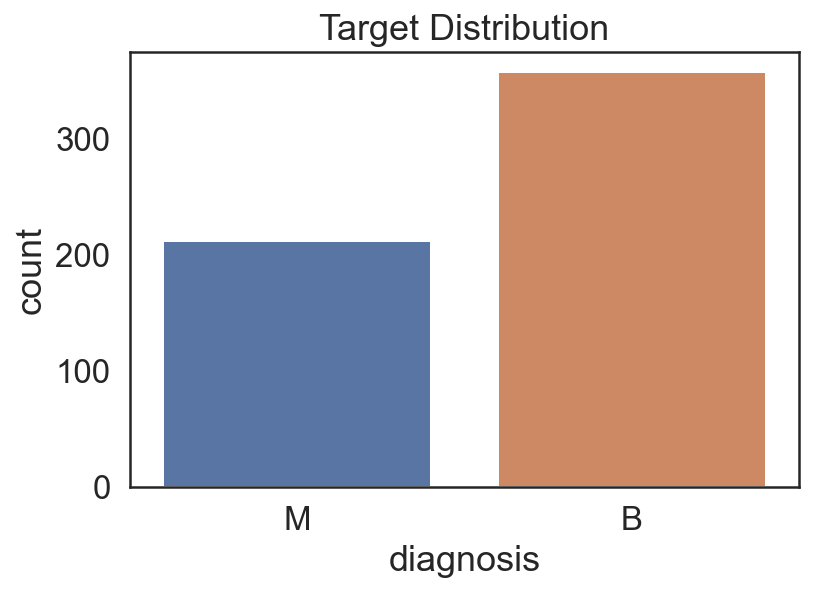

In [15]:
sns.countplot(target['diagnosis'])
plt.title('Target Distribution');

Conclusion:

There are alot more samples for benign class, there is a slight skewed classes problem (imbalance). 

We can see that about 63% (357 in total) of the samples belong to the benign class, while 37% (212 in total) of the samples belong to the malignant class, denoted a 'B' and 'M' respectivefully.


## 3. Primary Visual Data Analysis

In [16]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
data_scaled = pd.DataFrame(scaled_data, columns=data.columns)
data_scaled['diagnosis'] = target['diagnosis']

#### 3.1 Correlation Matrix 

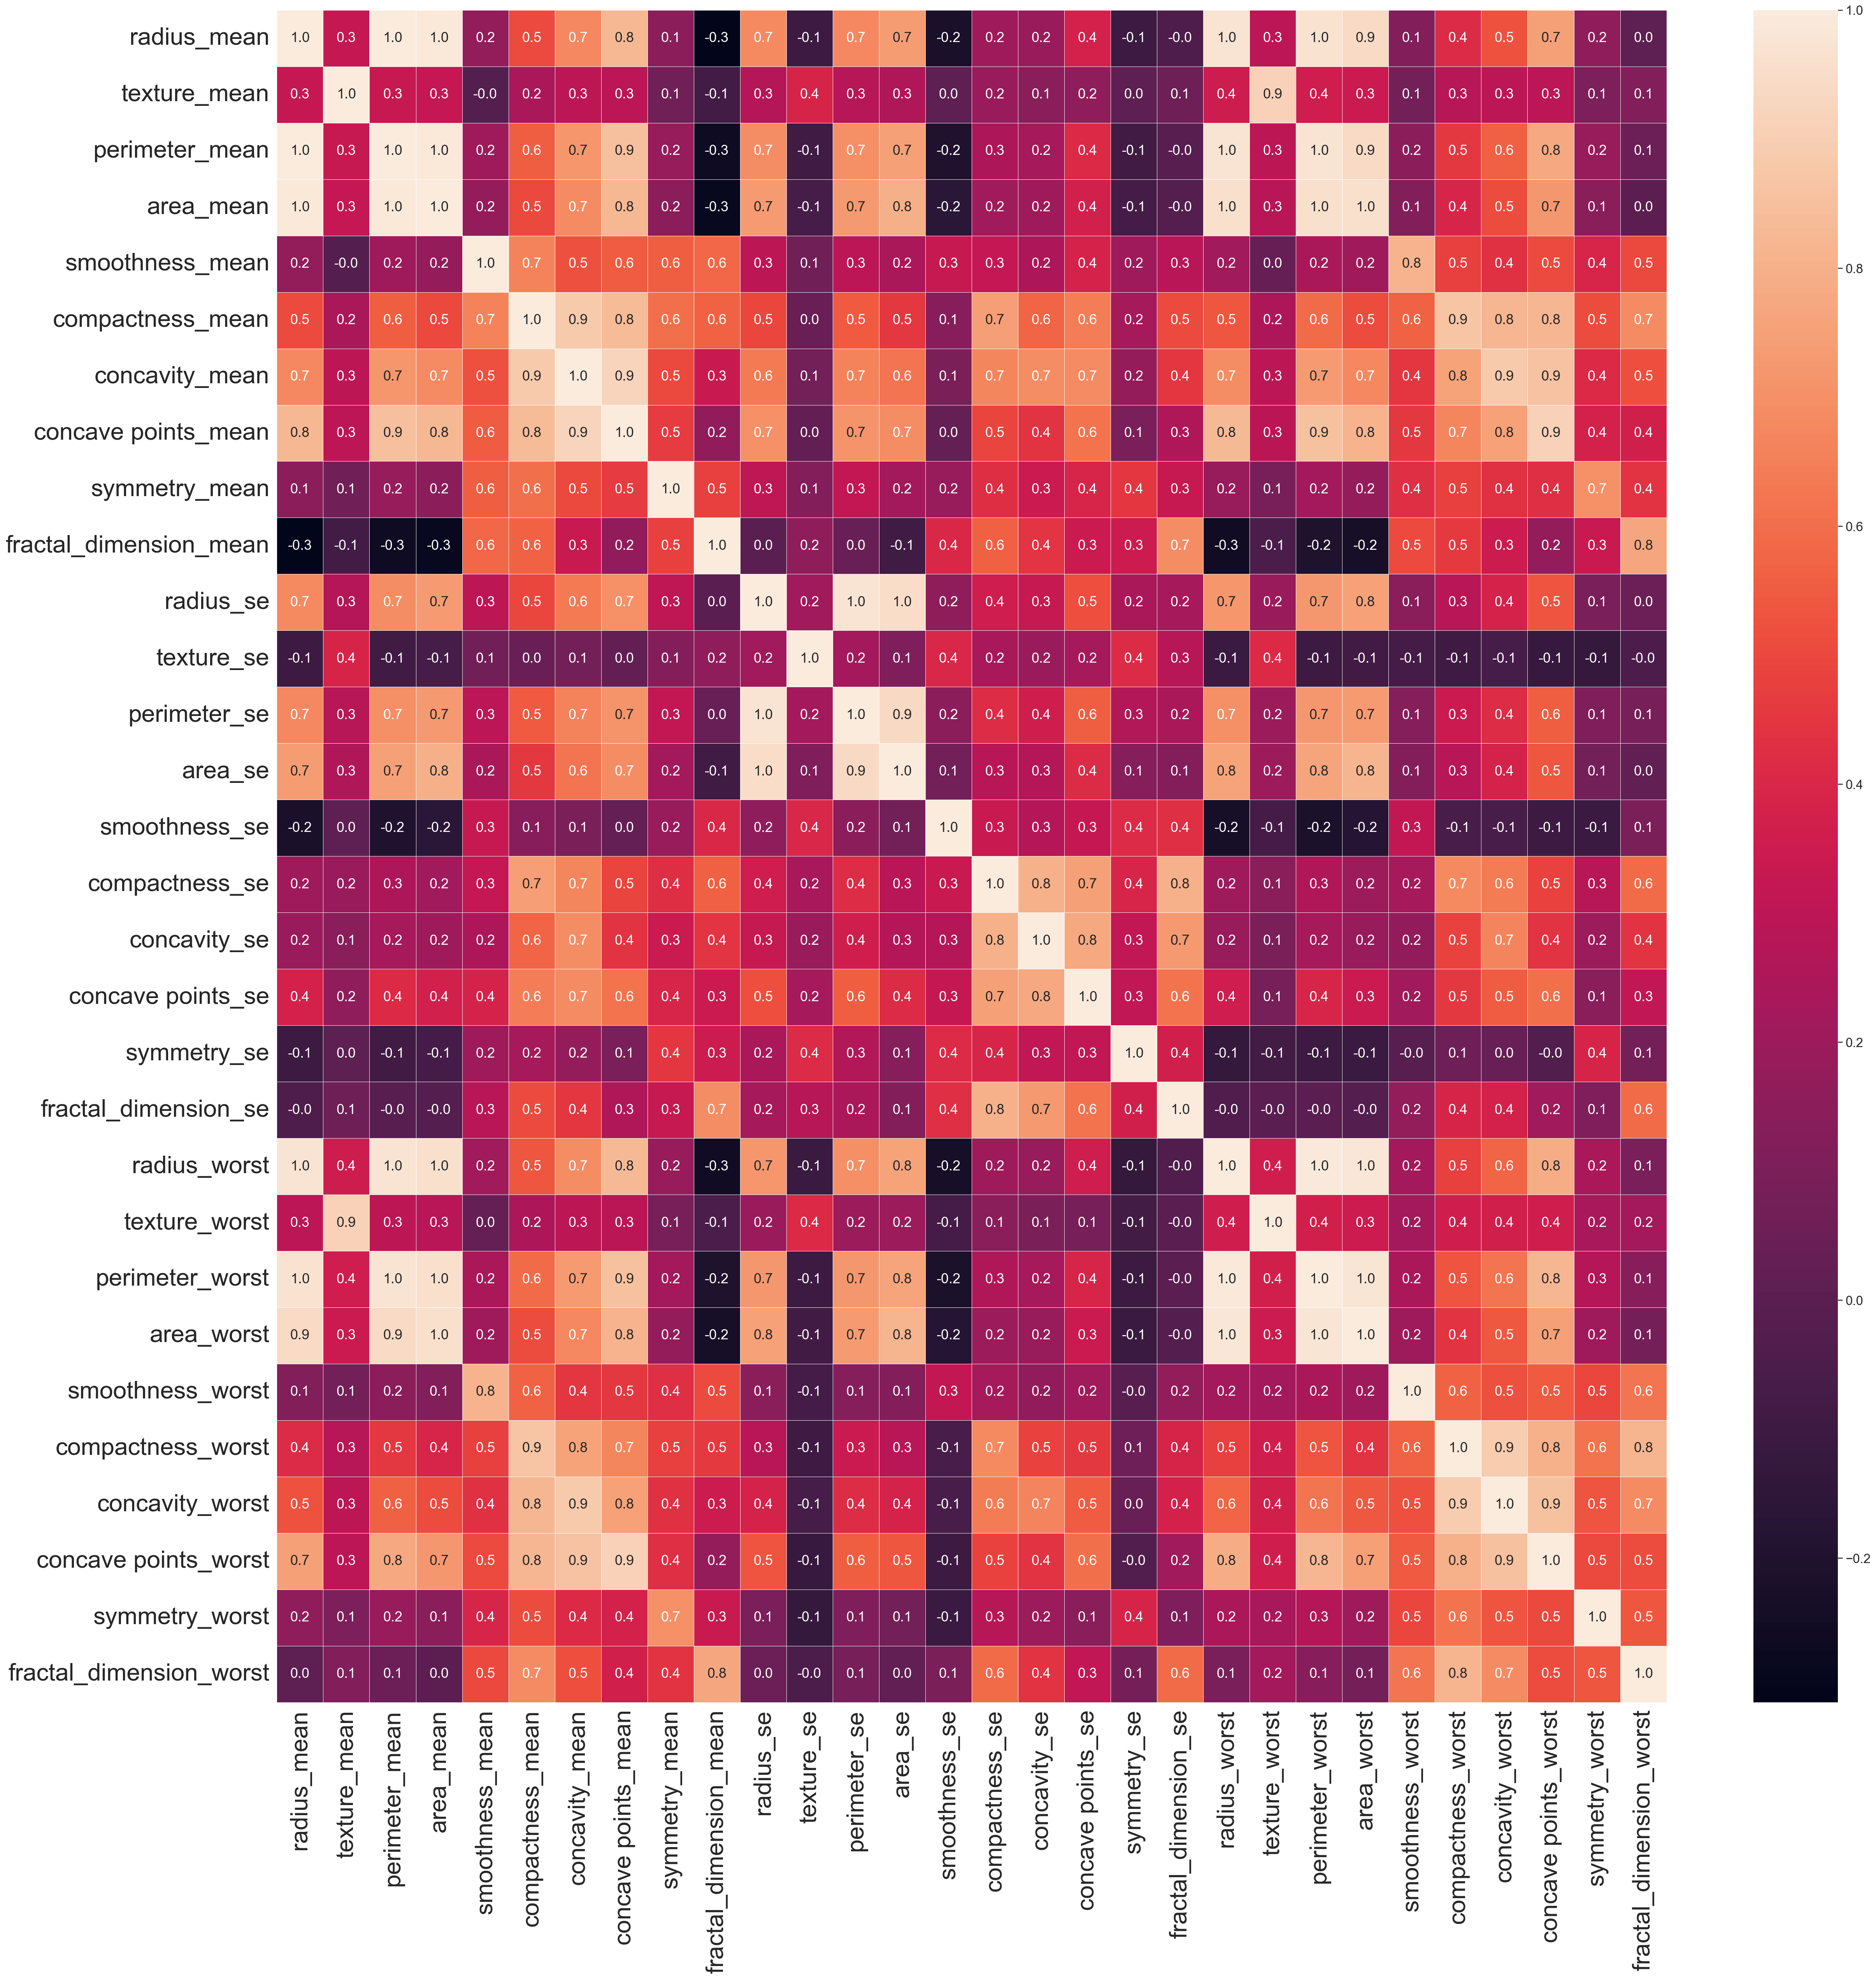

In [17]:
corr_matrix = data.corr()

plt.figure(figsize=[40, 40])
ax = sns.heatmap(corr_matrix, annot=True, fmt= '.1f', linewidths=.5)
ax.set_xticklabels(ax.get_xticklabels(), size='xx-large')
ax.set_yticklabels(ax.get_yticklabels(), size='xx-large')
plt.show();

Conclusion: 

There are several groups of correlated features
- radius_mean, perimeter_mean, area_mean
- compactness_mean, concavity_mean, concave points_mean
- radius_se, perimeter_se, area_se
- radius_worst, perimeter_worst and area_worst
- compactness_worst, concavity_worst, concave points_worst
- compactness_se, concavity_se, concave points_se
- texture_mean, texture_worst
- area_worst, area_mean

#### 3.2 Outliers

In [18]:
data_z = pd.melt(data_scaled, id_vars='diagnosis', var_name='features', value_name='value')
data_z.head()

,diagnosis,features,value
0,M,radius_mean,1.097064
1,M,radius_mean,1.829821
2,M,radius_mean,1.579888
3,M,radius_mean,-0.768909
4,M,radius_mean,1.750297


In [19]:
data_z.shape

(17070, 3)

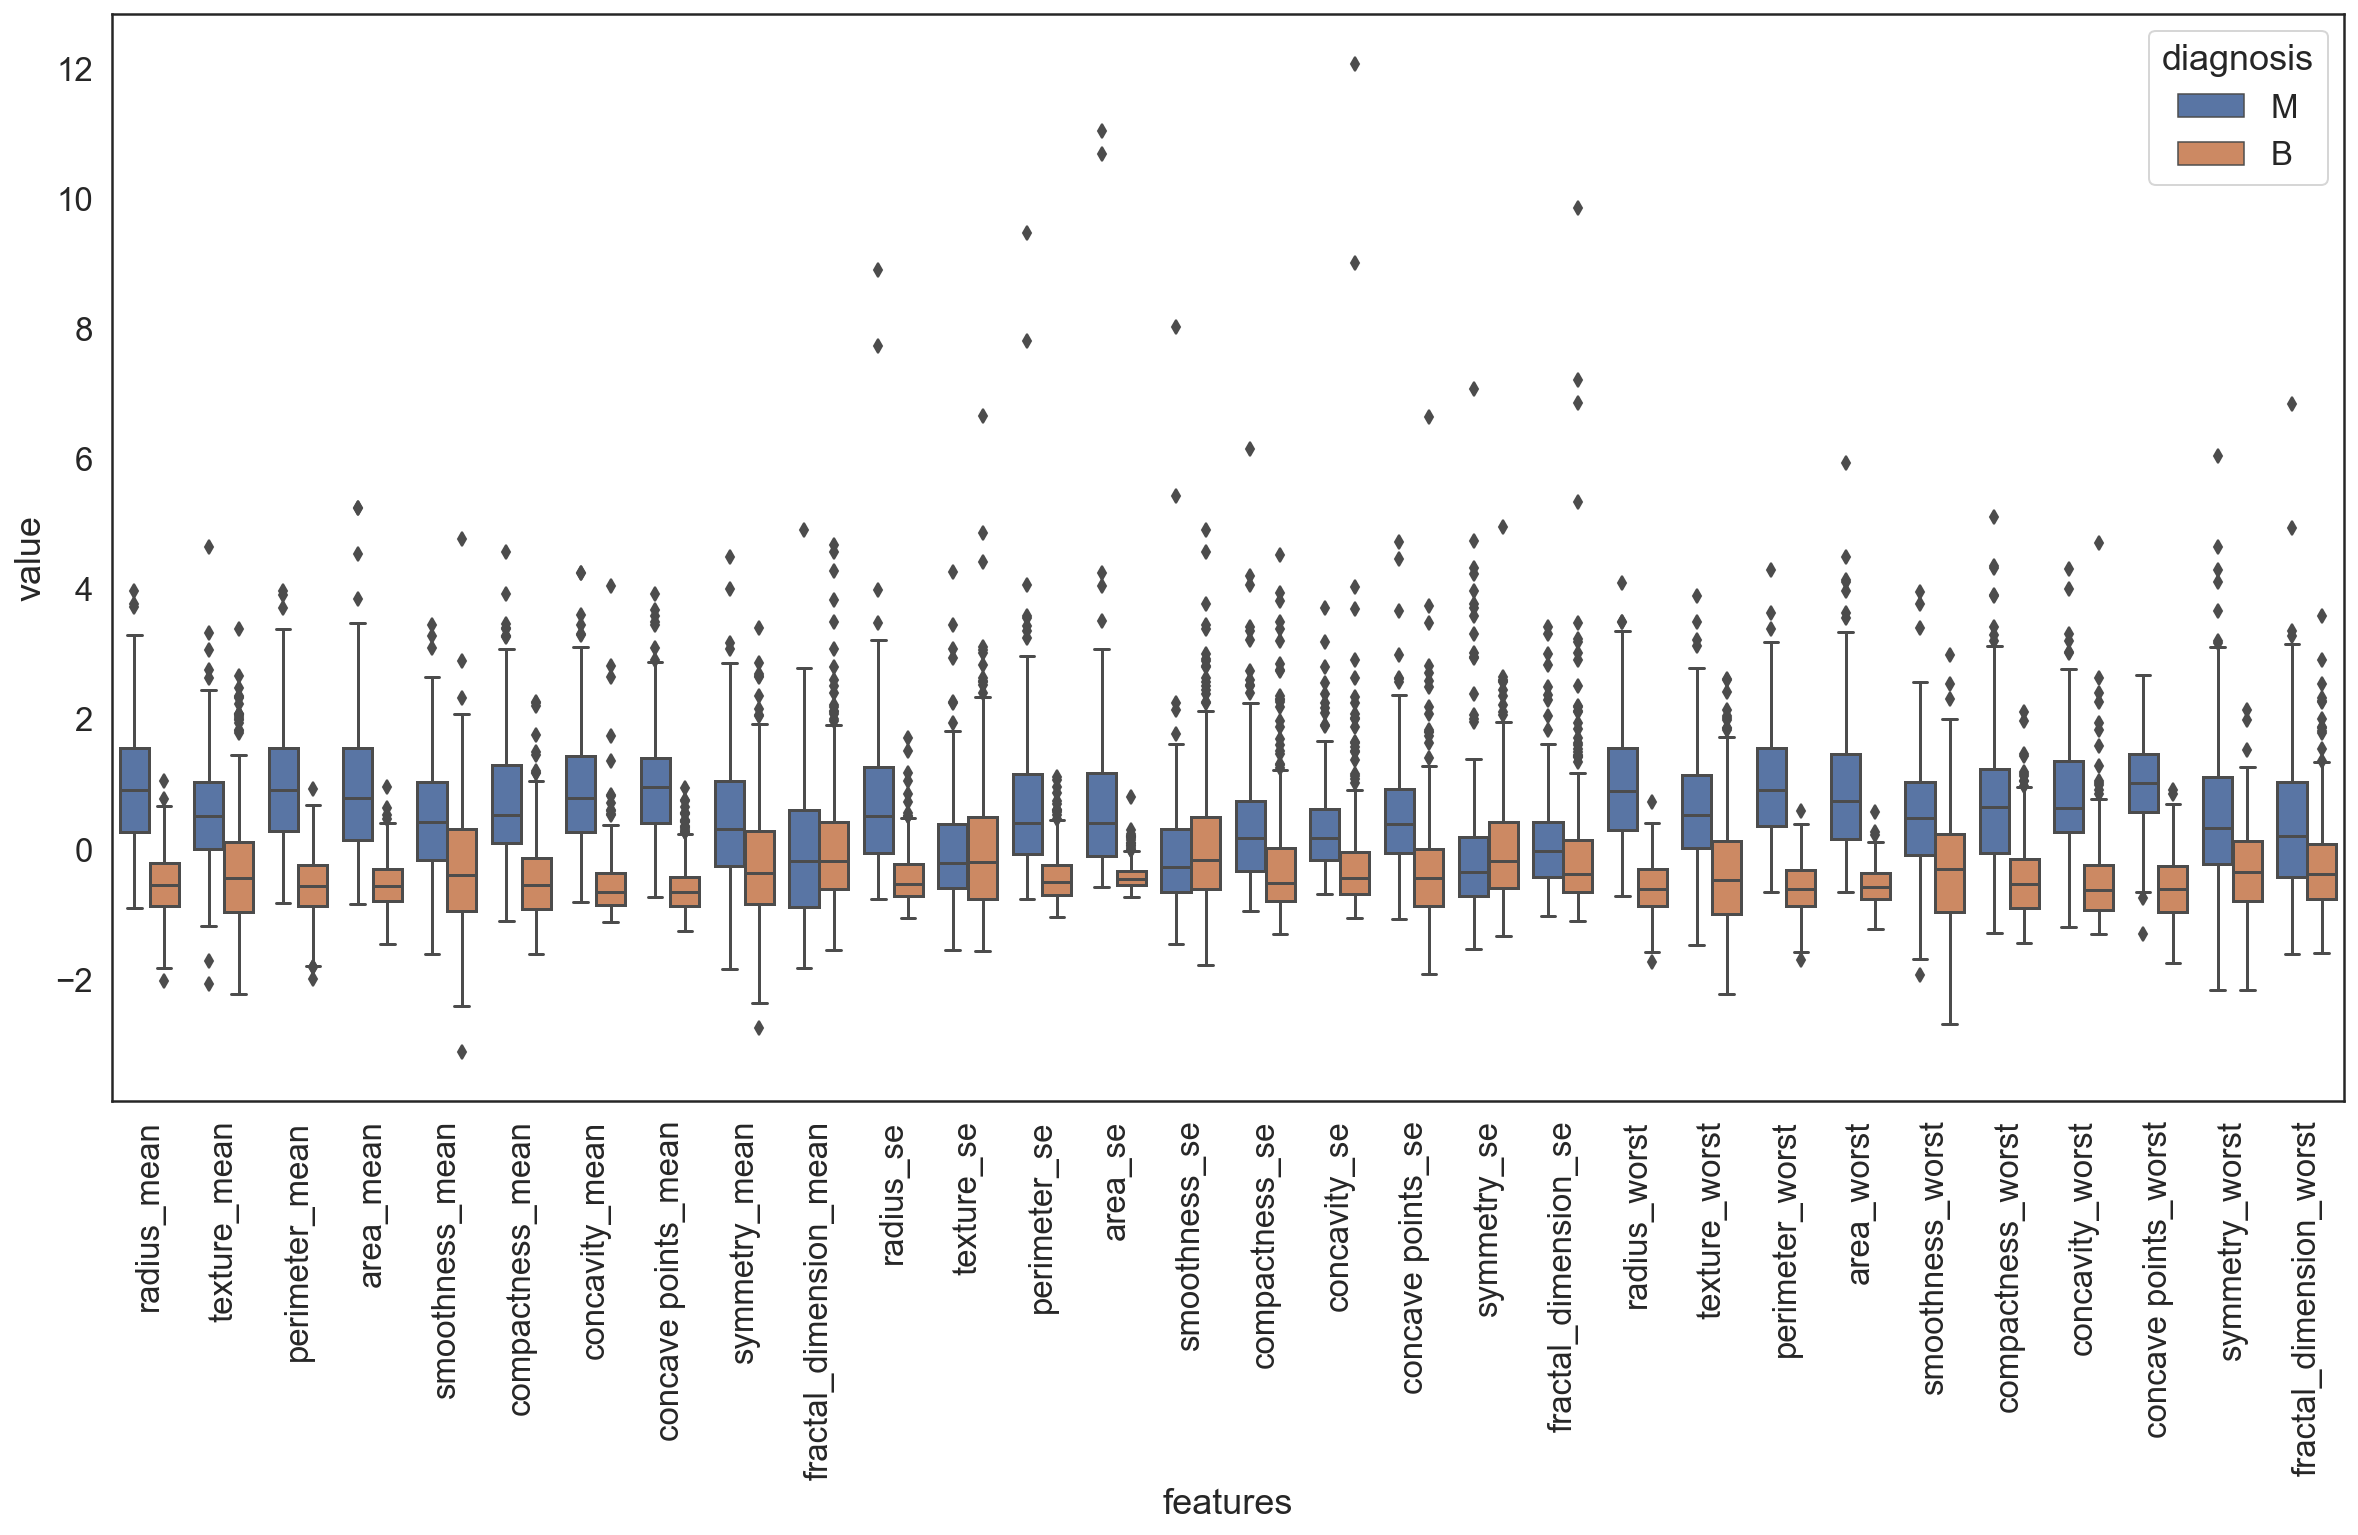

In [20]:
plt.figure(figsize=(20, 10));
ax = sns.boxplot(x='features', y='value', hue='diagnosis', data=data_z);
ax.set_xticklabels(ax.get_xticklabels());
plt.xticks(rotation=90);

Conclusion: 

The dataset contains a lot of variable with outliers. So before training we have to handle it.

#### 3.3 Distribution Of Classes

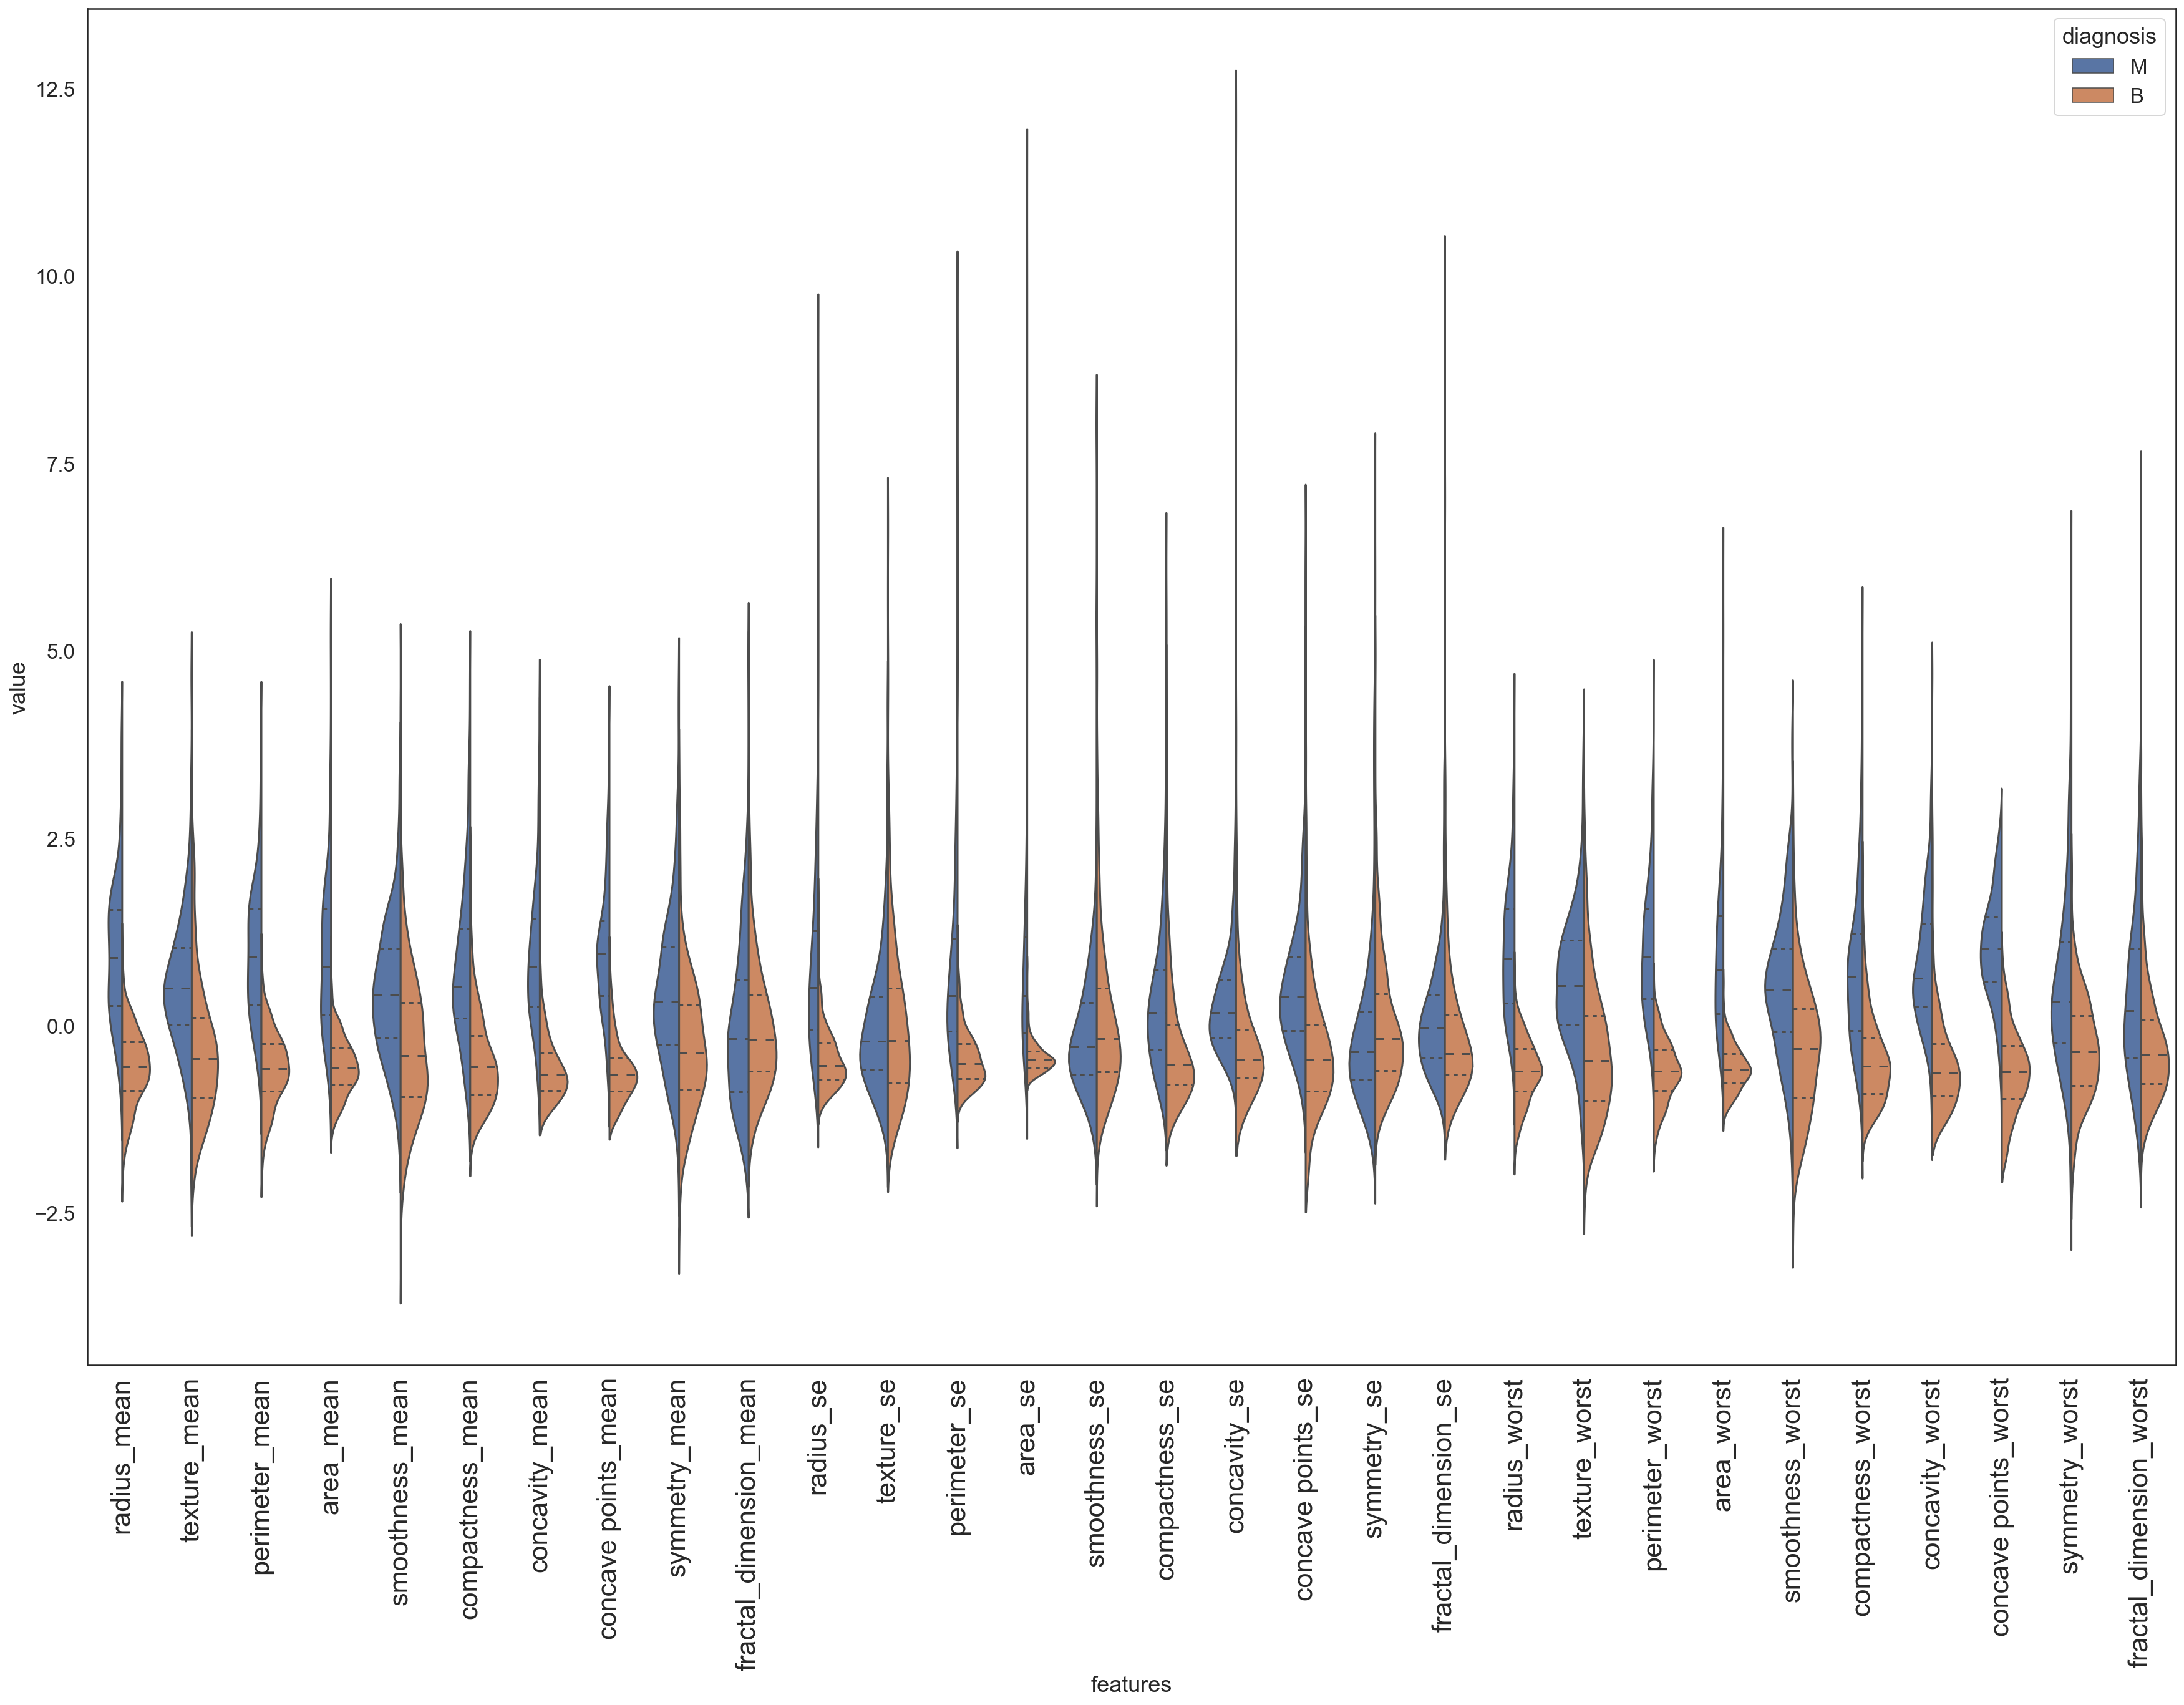

In [21]:
plt.figure(figsize=(30, 20));
ax = sns.violinplot(x="features", y="value", hue="diagnosis", data=data_z, split=True, inner="quartile");
ax.set_xticklabels(ax.get_xticklabels(), size='large');
plt.xticks(rotation=90);

Conclusion:
    
For some features, like radius_mean, texture_mean, median of each class separated, so they can be useful for classification. Other features, like smoothness_se, are not so separated and my be less useful for classification. Most all the features have normal-like distribution with long tail.

#### 3.4 Dimensionality Reduction

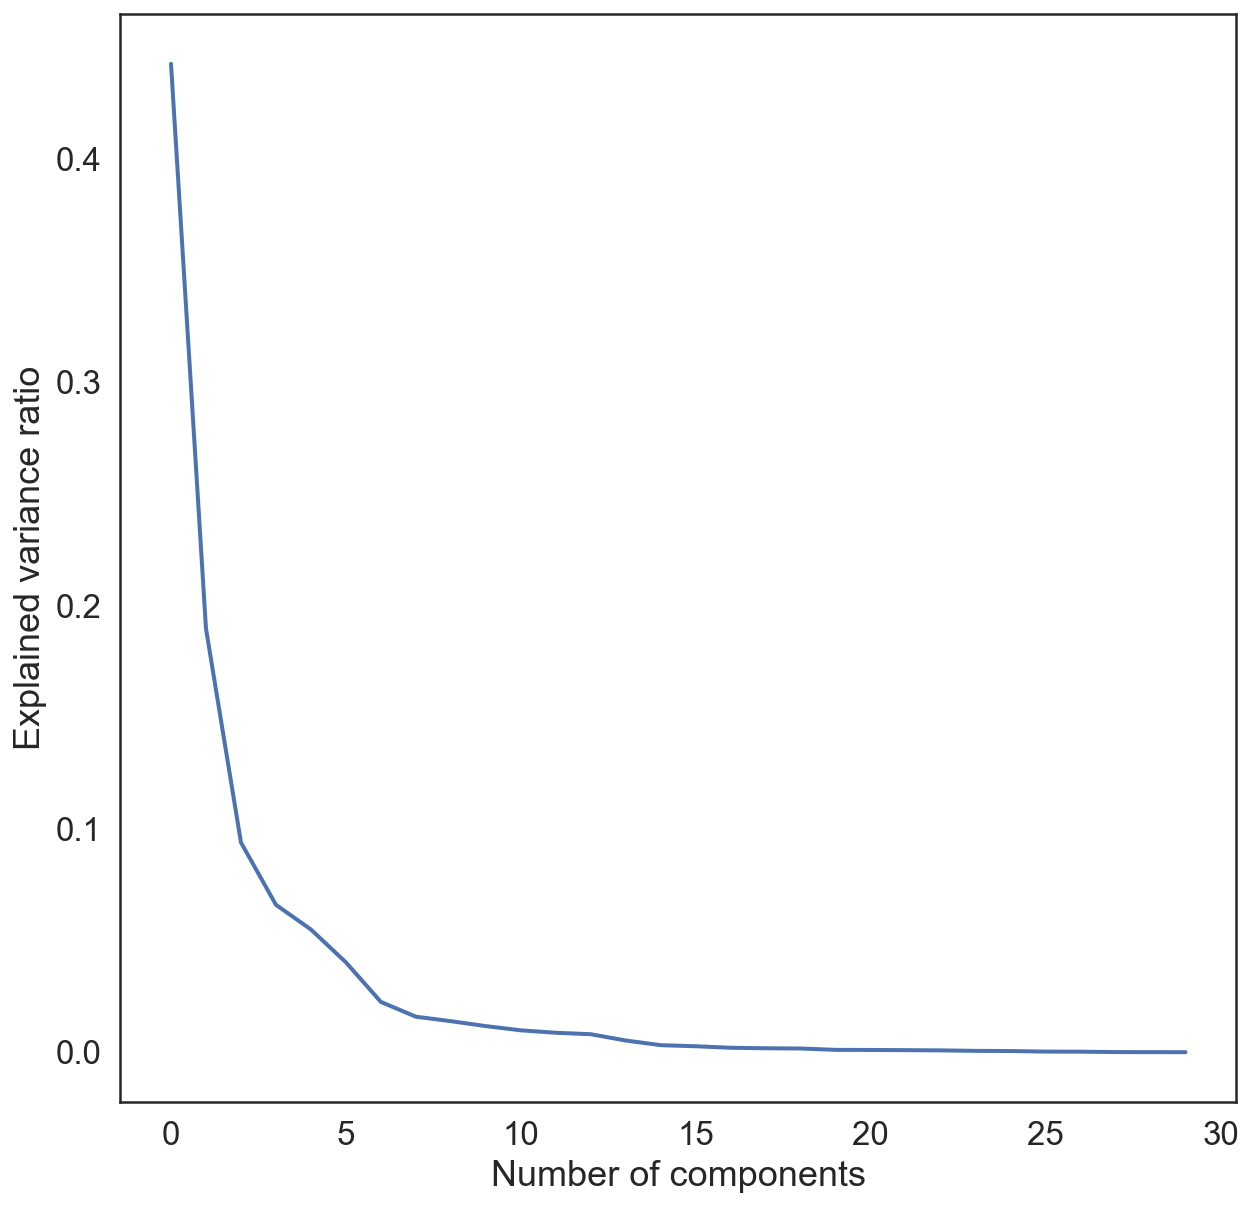

In [22]:
pca = PCA(random_state=999)
pca.fit(scaled_data)

plt.figure(figsize=(10, 10))
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.xlabel('Number of components');
plt.ylabel('Explained variance ratio');

Conclusion: 

According to elbow method 3 components may be choosen.

Check the number of components for explaining data variance:

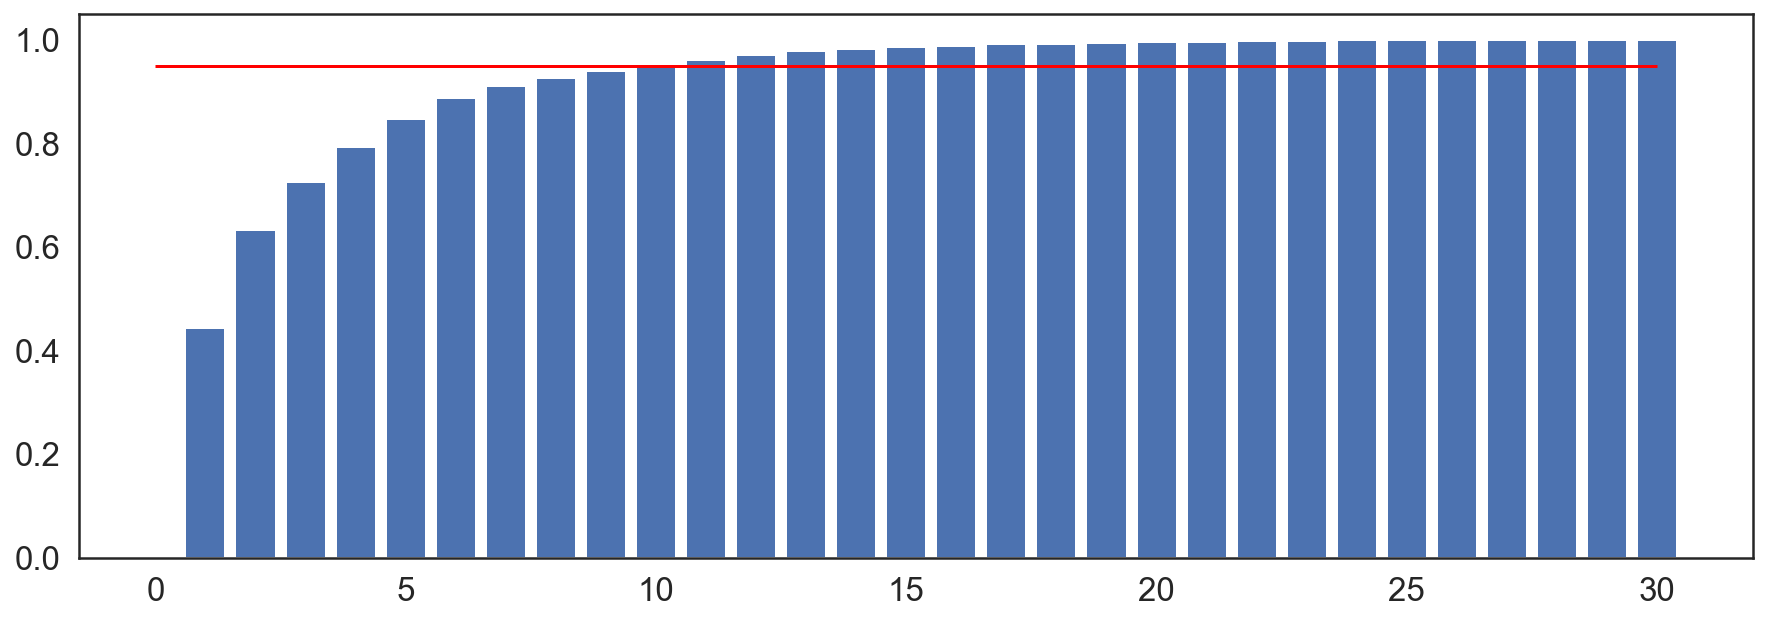

In [23]:
components = range(1, pca.n_components_ + 1)
plt.figure(figsize=(15, 5));
plt.bar(components, np.cumsum(pca.explained_variance_ratio_));
plt.hlines(y = .95, xmin=0, xmax=len(components), colors='red');

Conclusion: 

The two first components explains the 0.6324 of the variance. We need 10 principal components to explain more than 0.95 of the variance and 17 to explain more than 0.99.

Reduce dimensions of data and plot it:

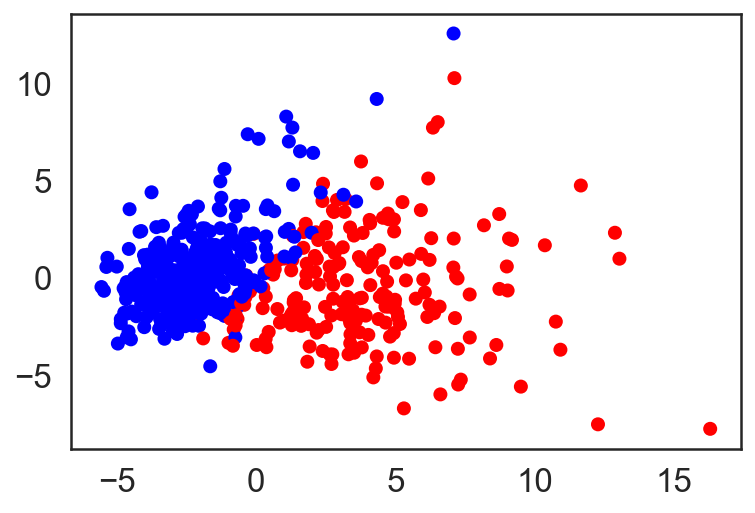

In [24]:
pca_two_comp = PCA(n_components=2, random_state=24)
two_comp_data = pca_two_comp.fit_transform(scaled_data)
plt.scatter(x=two_comp_data[:, 0], y=two_comp_data[:, 1], 
            c=target['diagnosis'].map({'M': 'red', 'B': 'blue'}))
plt.show();

Conclusion: 

Using only two components in our dataset, we are able to seperate (classify) the target good enough.

## 4. Final Data Analysis Insights

- The dataset is quite a small one with 569 samples and 30 features in total.
- All the features are numeric, except for the target feature - 'diagnosis' - which is categorical and will need to be transformed.
- The dataset contains no missing values.
- Many features are on different orders of magnitude (i.e. scales). 
- There are a lot of groups with correlated features. 
- Target variable distribution - 0.62/0.38. Slight skewed classes here, which is important for metric selection.
- Differences in features stitistics (mean) for each class are statistically important. So this features will be important for classification.
- There are outliers in data. 
- PCA shows thad data is good enough separable using only 3-5 features.

## 5. Metrics Selection

Our task to predict whether cancer cells are benign or malignant is a binary classification one. During EDA, we noticed that we are dealing with the problem of slight skewed classes (i.e. imbalance), so 'roc_auc' metric will be a good choice for model evaluation. This metric is simple enough and highly interpretable. Also, for the test set we will calculate 'classification_report', 'precision' and 'recall' metrics.

## 6. Model Selection

We will start by fitting and training a linear model, Logistic Regression, because:

- LogReg works well with non-categorical features (all features in our dataset are numerical).
- LogReg works well if there are no missing values (our dataset does not have any missing values).
- LogReg is robust to small noise in the data.
- Multi-collinearity can be handled by implementing regularization.
- Feature space of current task is not large.
- The model can easily be interpreted.

## 7. Data Preparation

#### 7.1 Split the dataset into train and test sets

In [25]:
# Examine the dataset
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [26]:
df.shape

(569, 33)

In [27]:
train, test = train_test_split(df, test_size=0.10, random_state=999)

In [28]:
train.shape, test.shape

((512, 33), (57, 33))

#### 7.2 Partition the data into features (X) and target (y)

In [29]:
X = train.drop(['id', 'Unnamed: 32', 'diagnosis'], axis=1)
y = train['diagnosis']

In [30]:
X.shape, y.shape

((512, 30), (512,))

In [31]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
161,19.19,15.94,126.30,1157.0,0.08694,0.11850,0.11930,0.09667,0.1741,0.05176,1.0000,0.6336,6.971,119.30,0.009406,0.03055,0.04344,0.027940,0.03156,0.003362,22.03,17.81,146.60,1495.0,0.1124,0.2016,0.2264,0.1777,0.2443,0.06251
518,12.88,18.22,84.45,493.1,0.12180,0.16610,0.04825,0.05303,0.1709,0.07253,0.4426,1.1690,3.176,34.37,0.005273,0.02329,0.01405,0.012440,0.01816,0.003299,15.05,24.37,99.31,674.7,0.1456,0.2961,0.1246,0.1096,0.2582,0.08893
469,11.62,18.18,76.38,408.8,0.11750,0.14830,0.10200,0.05564,0.1957,0.07255,0.4101,1.7400,3.027,27.85,0.014590,0.03206,0.04961,0.018410,0.01807,0.005217,13.36,25.40,88.14,528.1,0.1780,0.2878,0.3186,0.1416,0.2660,0.09270
264,17.19,22.07,111.60,928.3,0.09726,0.08995,0.09061,0.06527,0.1867,0.05580,0.4203,0.7383,2.819,45.42,0.004493,0.01206,0.02048,0.009875,0.01144,0.001575,21.58,29.33,140.50,1436.0,0.1558,0.2567,0.3889,0.1984,0.3216,0.07570
353,15.08,25.74,98.00,716.6,0.10240,0.09769,0.12350,0.06553,0.1647,0.06464,0.6534,1.5060,4.174,63.37,0.010520,0.02431,0.04912,0.017460,0.02120,0.004867,18.51,33.22,121.20,1050.0,0.1660,0.2356,0.4029,0.1526,0.2654,0.09438


#### 7.3 Encode target (y) variable

In [32]:
from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(y)

In [33]:
np.unique(y, return_counts=True)

(array([0, 1]), array([324, 188]))

#### 7.4 Split into training and testing sets

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=999, stratify=y)

## 8. Modeling: Logistic Regression

#### 8.1 Initialize model pipeline

In [35]:
# Initialize model
logreg = LogisticRegression(solver='liblinear', random_state=999)

logreg_pipe = Pipeline([
    ('scale', StandardScaler()),
    ('model', logreg)
])

In [36]:
# Get pipeline parameters
logreg_pipe.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()),
  ('model', LogisticRegression(random_state=999, solver='liblinear'))],
 'verbose': False,
 'scale': StandardScaler(),
 'model': LogisticRegression(random_state=999, solver='liblinear'),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'model__C': 1.0,
 'model__class_weight': None,
 'model__dual': False,
 'model__fit_intercept': True,
 'model__intercept_scaling': 1,
 'model__l1_ratio': None,
 'model__max_iter': 100,
 'model__multi_class': 'auto',
 'model__n_jobs': None,
 'model__penalty': 'l2',
 'model__random_state': 999,
 'model__solver': 'liblinear',
 'model__tol': 0.0001,
 'model__verbose': 0,
 'model__warm_start': False}

#### 8.2 Define model parameters

In [37]:
param_grid = {
    'model__penalty': ['l1', 'l2'],
    'model__C': np.linspace(.1, 1, 10)
}

#### 8.3 Define model evaluation strategy

In [38]:
skfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=999)
metric = 'roc_auc'

#### 8.4 Tune model with GridSearchCV

In [39]:
logreg_model = GridSearchCV(
    logreg_pipe,
    param_grid=param_grid,
    scoring=metric,
    n_jobs=-1,
    cv=skfold,
    verbose=1
)

In [40]:
%%time
logreg_model.fit(X_train, y_train);

Fitting 3 folds for each of 20 candidates, totalling 60 fits
CPU times: user 161 ms, sys: 97.9 ms, total: 259 ms
Wall time: 1.82 s


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=999, shuffle=True),
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model',
                                        LogisticRegression(random_state=999,
                                                           solver='liblinear'))]),
             n_jobs=-1,
             param_grid={'model__C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'model__penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=1)

#### 8.5 Evaluate model

In [41]:
print('Best Model Parameters:')
print(logreg_model.best_params_)

Best Model Parameters:
{'model__C': 0.1, 'model__penalty': 'l2'}


In [42]:
print('Model AUC Accuracy:')
print(logreg_model.best_score_)

Model AUC Accuracy:
0.9951410988712089


In [43]:
print('Model Results:')
logreg_results = pd.DataFrame(logreg_model.cv_results_)
logreg_results

Model Results:


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__C,param_model__penalty,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.009248,0.000225,0.007290,0.003386,0.1,l1,"{'model__C': 0.1, 'model__penalty': 'l1'}",0.992225,0.977050,0.997576,0.988950,0.008694,20
1,0.010224,0.001243,0.004317,0.000563,0.1,l2,"{'model__C': 0.1, 'model__penalty': 'l2'}",0.996112,0.991432,0.997879,0.995141,0.002720,1
2,0.011619,0.001980,0.007369,0.001519,0.2,l1,"{'model__C': 0.2, 'model__penalty': 'l1'}",0.995215,0.978580,0.997879,0.990558,0.008539,12
3,0.012464,0.003437,0.004856,0.000294,0.2,l2,"{'model__C': 0.2, 'model__penalty': 'l2'}",0.997010,0.988678,0.997879,0.994522,0.004148,2
4,0.010195,0.000494,0.005122,0.000743,0.3,l1,"{'model__C': 0.30000000000000004, 'model__pena...",0.996112,0.978580,0.997879,0.990857,0.008711,11
5,0.010148,0.000325,0.004561,0.000290,0.3,l2,"{'model__C': 0.30000000000000004, 'model__pena...",0.997010,0.987454,0.997576,0.994013,0.004644,3
6,0.009574,0.000970,0.006418,0.001399,0.4,l1,"{'model__C': 0.4, 'model__penalty': 'l1'}",0.996411,0.977968,0.997273,0.990551,0.008904,13
7,0.010134,0.000445,0.004575,0.000318,0.4,l2,"{'model__C': 0.4, 'model__penalty': 'l2'}",0.997010,0.985924,0.997576,0.993503,0.005364,4
8,0.009181,0.000909,0.008205,0.005124,0.5,l1,"{'model__C': 0.5, 'model__penalty': 'l1'}",0.996411,0.977662,0.997273,0.990449,0.009048,16
9,0.008723,0.000247,0.007143,0.001628,0.5,l2,"{'model__C': 0.5, 'model__penalty': 'l2'}",0.997010,0.984394,0.997273,0.992892,0.006010,5


## 9. Feature Engineering 

In [44]:
def apply_cat_op(data, attrs, operation, prefix):
    """
    Apply one operation to data attributes.
    """
    series = [data[attr].map(operation) for attr in attrs]
    
    _data = pd.concat(series, axis=1).add_prefix(prefix)
    new_attrs = _data.columns.values
    
    return _data, new_attrs

In [45]:
sq_operation = lambda x: x**2

In [46]:
for column in X_train.columns:
    X_train_sq, sq_attr = apply_cat_op(X_train, [column], sq_operation, 'sq_')
    data = pd.concat([X_train, X_train_sq], axis=1)
    
    logreg_model = GridSearchCV(
                        logreg_pipe, 
                        param_grid=param_grid,
                        scoring=metric,
                        n_jobs=-1,
                        cv=skfold,
                        verbose=0)
    
    logreg_model.fit(data, y_train);
    
    print('Column:', column, ' ', 
          'Accuracy:', logreg_model.best_score_, ' ',
          'Best Params:', logreg_model.best_params_)

Column: radius_mean   Accuracy: 0.9951410988712089   Best Params: {'model__C': 0.1, 'model__penalty': 'l2'}
Column: texture_mean   Accuracy: 0.9952430980552155   Best Params: {'model__C': 0.1, 'model__penalty': 'l2'}
Column: perimeter_mean   Accuracy: 0.9951410988712089   Best Params: {'model__C': 0.1, 'model__penalty': 'l2'}
Column: area_mean   Accuracy: 0.9949371005031958   Best Params: {'model__C': 0.1, 'model__penalty': 'l2'}
Column: smoothness_mean   Accuracy: 0.9951410988712089   Best Params: {'model__C': 0.1, 'model__penalty': 'l2'}
Column: compactness_mean   Accuracy: 0.9950390996872024   Best Params: {'model__C': 0.1, 'model__penalty': 'l2'}
Column: concavity_mean   Accuracy: 0.9952384617286697   Best Params: {'model__C': 0.1, 'model__penalty': 'l2'}
Column: concave points_mean   Accuracy: 0.9946320920341728   Best Params: {'model__C': 0.1, 'model__penalty': 'l2'}
Column: symmetry_mean   Accuracy: 0.9951401097882128   Best Params: {'model__C': 0.1, 'model__penalty': 'l2'}
Colu

As we can see squaring a few features slightly improved accuracy, with params {'C': 0.1, 'penalty': 'l2'}. The other squared features didn't seem to improve the accuracy.

Let's add two new squared features to our train and test set.

In [47]:
X_train_sq, atr = apply_cat_op(X_train, ['radius_se'], sq_operation, 'sq_')
X_train = pd.concat([X_train, X_train_sq], axis=1)

In [48]:
X_test_sq, atr = apply_cat_op(X_test, ['radius_se'], sq_operation, 'sq_')
X_test = pd.concat([X_test, X_test_sq], axis=1)

In [49]:
X_train_sq, atr = apply_cat_op(X_train, ['area_se'], sq_operation, 'sq_')
X_train = pd.concat([X_train, X_train_sq], axis=1)

In [50]:
X_test_sq, atr = apply_cat_op(X_test, ['area_se'], sq_operation, 'sq_')
X_test = pd.concat([X_test, X_test_sq], axis=1)

In [51]:
X_train.shape, X_test.shape

((358, 32), (154, 32))

In [52]:
X_train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,sq_radius_se,sq_area_se
484,15.73,11.28,102.80,747.2,0.10430,0.12990,0.11910,0.06211,0.1784,0.06259,0.1630,0.3871,1.143,13.87,0.006034,0.018200,0.033360,0.010670,0.01175,0.002256,17.01,14.20,112.50,854.3,0.1541,0.29790,0.40040,0.14520,0.2557,0.08181,0.026569,192.3769
429,12.72,17.67,80.98,501.3,0.07896,0.04522,0.01402,0.01835,0.1459,0.05544,0.2954,0.8836,2.109,23.24,0.007337,0.011740,0.005383,0.005623,0.01940,0.001180,13.82,20.96,88.87,586.8,0.1068,0.09605,0.03469,0.03612,0.2165,0.06025,0.087261,540.0976
411,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,0.06340,0.1967,1.3870,1.342,13.54,0.005158,0.009355,0.010560,0.007483,0.01718,0.002198,12.41,26.44,79.93,471.4,0.1369,0.14820,0.10670,0.07431,0.2998,0.07881,0.038691,183.3316
142,11.43,17.31,73.66,398.0,0.10920,0.09486,0.02031,0.01861,0.1645,0.06562,0.2843,1.9080,1.937,21.38,0.006664,0.017350,0.011580,0.009520,0.02282,0.003526,12.78,26.76,82.66,503.0,0.1413,0.17920,0.07708,0.06402,0.2584,0.08096,0.080826,457.1044
56,19.21,18.57,125.50,1152.0,0.10530,0.12670,0.13230,0.08994,0.1917,0.05961,0.7275,1.1930,4.837,102.50,0.006458,0.023060,0.029450,0.015380,0.01852,0.002608,26.14,28.14,170.10,2145.0,0.1624,0.35110,0.38790,0.20910,0.3537,0.08294,0.529256,10506.2500


##### Train our model with best parameters on new data with sq_symmetry_worst added.

In [53]:
#Instantiate best model
logreg = LogisticRegression(solver='liblinear', penalty='l2', C=0.1, random_state=999)

best_model = Pipeline([
    ('scale', StandardScaler()),
    ('model', logreg)
])

best_model.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('model',
                 LogisticRegression(C=0.1, random_state=999,
                                    solver='liblinear'))])

## 10. Plotting training and validation curves

##### 10.1 Training Curve

In [54]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

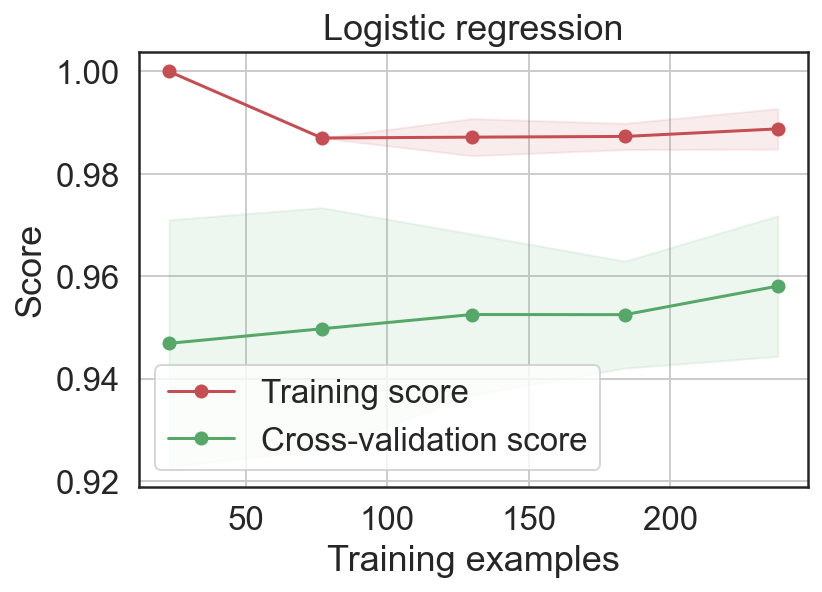

In [55]:
plot_learning_curve(best_model, 'Logistic regression', 
                    X_train, y_train, cv=skfold);

Conclusion: 

Such a gap between training and validating curve indicates overfitting. But we can see that validation curve increasing with increasing amount of training examples, so more data is likely to help beat overfitting.

## 11. Prediction for test samples

##### Accuracy Score:

In [57]:
score = best_model.score(X_test, y_test)  
print(f'The test accuracy score is {score:.3f}')

The test accuracy score is 0.987


In [58]:
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'The test accuracy score is {accuracy:.3f}')

The test accuracy score is 0.987


##### Confusion Matrix:

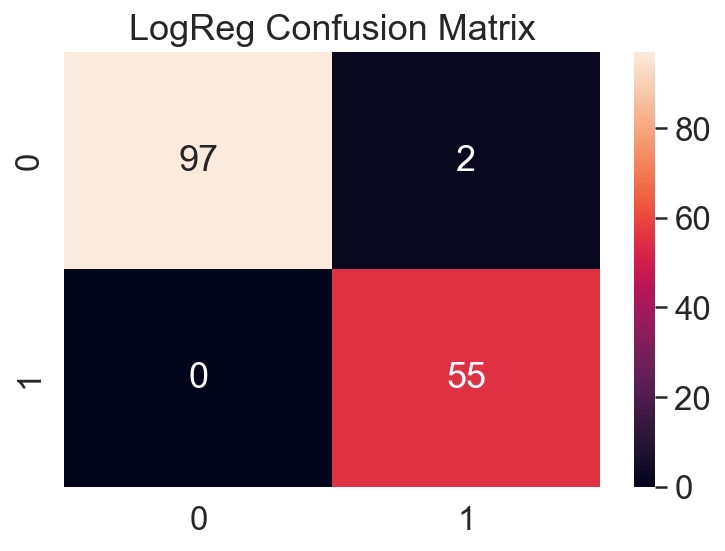

In [59]:
test_confusion_matrix = confusion_matrix(y_pred, y_test)
sns.heatmap(test_confusion_matrix, annot=True, fmt='d')
plt.title('LogReg Confusion Matrix');

From confusion matrix we can see that we have made one wrong prediction.

##### Classification Report:

In [60]:
classification_report = classification_report(y_test, y_pred)
print(f'LogReg Classification Report:\n\n {classification_report}')

LogReg Classification Report:

               precision    recall  f1-score   support

           0       0.98      1.00      0.99        97
           1       1.00      0.96      0.98        57

    accuracy                           0.99       154
   macro avg       0.99      0.98      0.99       154
weighted avg       0.99      0.99      0.99       154



##### Precision:

In [61]:
precision = precision_score(y_test, y_pred)
print(f'The precision score is {precision:.3f}')

The precision score is 1.000


##### Recall:

In [62]:
recall = recall_score(y_test, y_pred)
print(f'The recall score is {recall:.3f}')

The recall score is 0.965


## 12. CV Score

In [63]:
outer_skfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=999)

cv_score = cross_val_score(best_model,
                           X_train, y_train,
                           cv=outer_skfold,
                           scoring=metric,
                           n_jobs=-1,
                           error_score='raise')

print(f'The mean cross-validation accuracy is: {cv_score.mean():.3f} +/- {cv_score.std():.3f}')

The mean cross-validation accuracy is: 0.996 +/- 0.006


In [66]:
best_model_results = pd.DataFrame(cv_score, columns=['Mean CV AUC Score'])
best_model_results

,Mean CV AUC Score
0,0.996656
1,1.000000
2,1.000000
3,0.993311
4,0.979933
5,1.000000
6,1.000000
7,0.990260
8,1.000000
9,1.000000


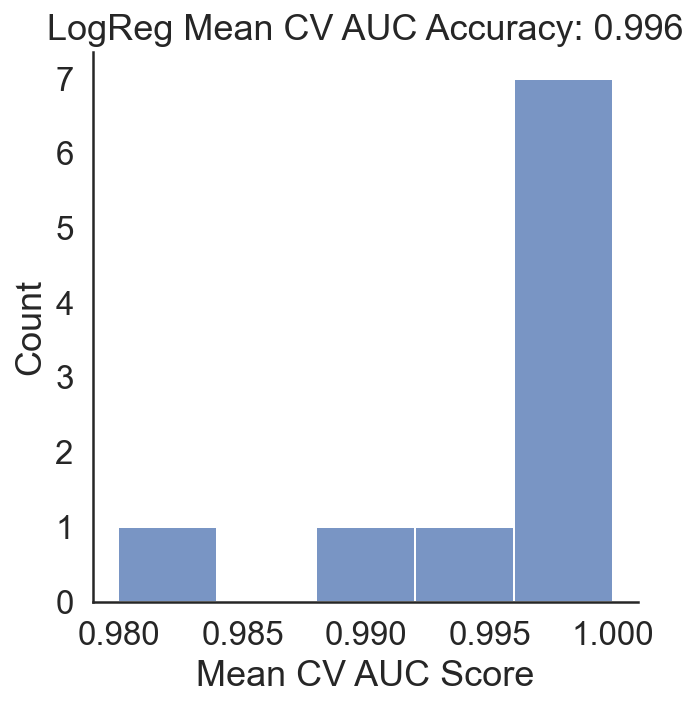

In [67]:
sns.displot(data=best_model_results, x='Mean CV AUC Score')
plt.title(f'LogReg Mean CV AUC Accuracy: {cv_score.mean():.3f}');

## 13. Conclusions

We have a reusable machine learning pipeline. Our Logistic Regression model gives a 98.7% accuracy, 100% precision and 96.5% recall on the test set. Overall mean CV AUC Accuracy is 99.6%.

## 14. Improvements

- Collect more data and re-train model on it, as we can see validation score improvement with data amount increasing on learning curve;
- More feature engineering, including based on medicine;
- Apply PCA for data dimensionality reduction and train model on reduced data;
- Try different models, like neural network (for capturing complex non-linear dependences) or random forest (robust to overfitting), perhaps try stacking different models.

## 15. Save Model

In [68]:
import joblib 
joblib.dump(best_model, 'breast_cancer_model_v1.pkl', compress=1)

['breast_cancer_model_v1.pkl']

## 16. Load Model

In [69]:
breast_cancer_model = joblib.load('breast_cancer_model_v1.pkl')

In [70]:
breast_cancer_model

Pipeline(steps=[('scale', StandardScaler()),
                ('model',
                 LogisticRegression(C=0.1, random_state=999,
                                    solver='liblinear'))])

## 17. Deploy Model on new data

In [71]:
test.shape

(57, 33)

In [72]:
test.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
465,9113239,B,13.24,20.13,86.87,542.9,0.08284,0.12230,0.10100,0.02833,0.1601,0.06432,0.2810,0.8135,3.369,23.81,0.004929,0.06657,0.07683,0.013680,0.01526,0.008133,15.44,25.50,115.00,733.5,0.1201,0.5646,0.6556,0.13570,0.2845,0.12490,NaN
219,88119002,M,19.53,32.47,128.00,1223.0,0.08420,0.11300,0.11450,0.06637,0.1428,0.05313,0.7392,1.3210,4.722,109.90,0.005539,0.02644,0.02664,0.010780,0.01332,0.002256,27.90,45.41,180.20,2477.0,0.1408,0.4097,0.3995,0.16250,0.2713,0.07568,NaN
238,883270,B,14.22,27.85,92.55,623.9,0.08223,0.10390,0.11030,0.04408,0.1342,0.06129,0.3354,2.3240,2.105,29.96,0.006307,0.02845,0.03850,0.010110,0.01185,0.003589,15.75,40.54,102.50,764.0,0.1081,0.2426,0.3064,0.08219,0.1890,0.07796,NaN
236,88299702,M,23.21,26.97,153.50,1670.0,0.09509,0.16820,0.19500,0.12370,0.1909,0.06309,1.0580,0.9635,7.247,155.80,0.006428,0.02863,0.04497,0.017160,0.01590,0.003053,31.01,34.51,206.00,2944.0,0.1481,0.4126,0.5820,0.25930,0.3103,0.08677,NaN
267,8910499,B,13.59,21.84,87.16,561.0,0.07956,0.08259,0.04072,0.02142,0.1635,0.05859,0.3380,1.9160,2.591,26.76,0.005436,0.02406,0.03099,0.009919,0.02030,0.003009,14.80,30.04,97.66,661.5,0.1005,0.1730,0.1453,0.06189,0.2446,0.07024,NaN


In [73]:
X_new = test.drop(['id', 'Unnamed: 32', 'diagnosis'], axis=1)
y_new = test['diagnosis']

In [74]:
X_new.shape, y_new.shape

((57, 30), (57,))

In [75]:
y_new = LabelEncoder().fit_transform(y_new)
np.unique(y_new, return_counts=True)

(array([0, 1]), array([33, 24]))

In [76]:
breast_cancer_model.fit(X, y)
y_pred = breast_cancer_model.predict(X_new)
predictions = pd.DataFrame({'Model Prediction': y_pred, 'Actual Result': y_new},)
predictions

,Model Prediction,Actual Result
0,0,0
1,1,1
2,0,0
3,1,1
4,0,0
5,1,1
6,0,0
7,1,1
8,0,0
9,1,1


In [77]:
compare = y_pred == y_new
np.unique(compare, return_counts=True)

(array([False,  True]), array([ 2, 55]))

In [78]:
# Save predictions to csv file
predictions.to_csv('breast_cancer_predictions_v1.csv')
print('CSV file saved!!')

CSV file saved!!


## 18. Reproducibility

In [79]:
%load_ext watermark
%watermark -a 'Rainier Goubault' -nmv --packages numpy,pandas,scipy,sklearn,matplotlib,seaborn

Author: Rainier Goubault

Python implementation: CPython
Python version       : 3.9.7
IPython version      : 7.27.0

numpy     : 1.21.2
pandas    : 1.3.3
scipy     : 1.7.1
sklearn   : 0.24.2
matplotlib: 3.4.3
seaborn   : 0.11.2

Compiler    : Clang 11.1.0 
OS          : Darwin
Release     : 20.6.0
Machine     : x86_64
Processor   : i386
CPU cores   : 8
Architecture: 64bit

